In [20]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import  wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train1.csv to train1.csv


In [4]:
df = pd.read_csv('train1.csv')

In [5]:
df.head()


,user_review,user_suggestion,clean_text
0,Fun time waster. Gets a bit boring once you ge...,1,Fun time waster Gets bit boring get room type ...
1,Early Access Reviewthis game is suck and awsom...,0,Early Access Reviewthis game suck awsomethe pa...
2,"I currently wouldn't reccomend this game atm, ...",0,I currently would nt reccomend game atm strong...
3,Where do I even begin with this? Between the r...,1,Where I even begin Between random crits Fair B...
4,Only for aircraft enthusiasts. In the military...,1,Only aircraft enthusiast In military genre har...


In [6]:
df.shape

(13995, 3)

In [7]:
df1 = df[['user_review','user_suggestion']]

In [8]:
df1.head(15)

,user_review,user_suggestion
0,Fun time waster. Gets a bit boring once you ge...,1
1,Early Access Reviewthis game is suck and awsom...,0
2,"I currently wouldn't reccomend this game atm, ...",0
3,Where do I even begin with this? Between the r...,1
4,Only for aircraft enthusiasts. In the military...,1
5,Early Access ReviewThis game was good ... it W...,0
6,==============CHARACTERS==============In Brawl...,1
7,"Early Access ReviewIt's a fun game, I once spe...",1
8,Do you like adventure? Do you like to explore ...,1
9,Other people are complaining about the game de...,1


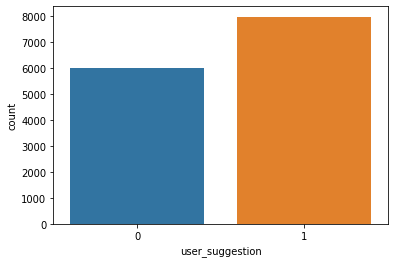

In [9]:
sb.countplot(x='user_suggestion', data=df1)

In [10]:
df1['user_suggestion'].value_counts()

1    7975
0    6020
Name: user_suggestion, dtype: int64

In [11]:
# ratio of positive '1' to negative '0' reviews
df1['user_suggestion'].value_counts(normalize=True)

1    0.569846
0    0.430154
Name: user_suggestion, dtype: float64

In [12]:
print (df1.user_review[0])

print (re.sub("[^a-zA-Z0-9]", " ",df1.user_review[0]))

Fun time waster. Gets a bit boring once you get all room types. Outfits aren't needed once you start training specials. Just churning through all of the quests trying to get all weapons and outfits.
Fun time waster  Gets a bit boring once you get all room types  Outfits aren t needed once you start training specials  Just churning through all of the quests trying to get all weapons and outfits 


In [21]:
Refine('Bro-ski* *Hou,')

'Broski Hou'

In [22]:
df1['clean_text']=list(map(lambda x:Refine(x),df1['user_review']))

In [23]:
df1.head()

,user_review,user_suggestion,clean_text
0,Fun time waster. Gets a bit boring once you ge...,1,Fun time waster Gets bit boring get room type ...
1,Early Access Reviewthis game is suck and awsom...,0,Early Access Reviewthis game suck awsomethe pa...
2,"I currently wouldn't reccomend this game atm, ...",0,I currently would nt reccomend game atm strong...
3,Where do I even begin with this? Between the r...,1,Where I even begin Between random crits Fair B...
4,Only for aircraft enthusiasts. In the military...,1,Only aircraft enthusiast In military genre har...


In [24]:
pos_phrases = df1[df1.user_suggestion == 1]
pos_words = []
for t in pos_phrases.clean_text:
    pos_words.append(t)
#pos_words[:5]

In [25]:
pos_text = pd.Series(pos_words).str.cat(sep=' ')
pos_text[:200]

'Fun time waster Gets bit boring get room type Outfits nt needed start training special Just churning quest trying get weapon outfit Where I even begin Between random crits Fair Balanced guy Funny Joke'

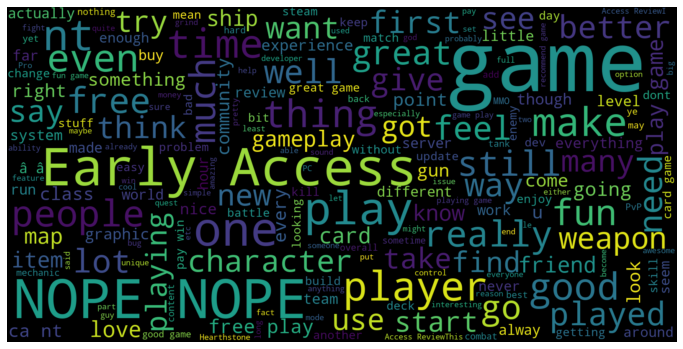

In [26]:
# Commonly used words in positive reviews
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
negPhrases = df1[df1.user_suggestion == 0]
negWords = []
for t in negPhrases.clean_text:
    negWords.append(t)
#neu_words[:5]

In [28]:
negText = pd.Series(negWords).str.cat(sep=' ')
negText[:200] 

'Early Access Reviewthis game suck awsomethe part suck game hard earn exp must kill player gon na earn 10 exp part awsome game game freeand spend half hour find ♥♥♥♥ing single match I currently would n'

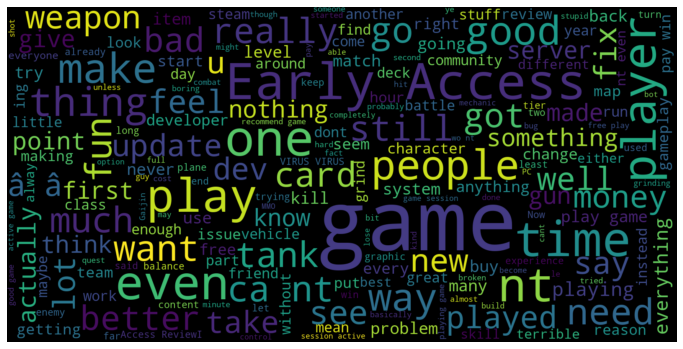

In [29]:
# Commonly used words in negative reviews
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negText)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [31]:
x_train=vectorizer.fit_transform(df1['clean_text'])

In [32]:
y_train=df1['user_suggestion']

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
# nb = MultinomialNB()
nb = BernoulliNB()
nb.fit(x_train,y_train)

BernoulliNB()

In [37]:
uploaded = files.upload()

Saving test.csv to test.csv


In [38]:
test=pd.read_csv('test.csv')
x_test=vectorizer.transform(test['clean_text'])

In [39]:
y_test=test['user_suggestion']

In [40]:
y_test.unique()

array([1, 0])

In [41]:
y_pred=nb.predict(x_test)

In [42]:
def GetSentiment(val):
    if val==0:
        return 0
    elif val==1:
        return 1
    
Result=test[['user_review','user_suggestion']]

Result['Predicted_sentiment'] = list(map(lambda x:GetSentiment(x),y_pred))

In [43]:
Result.head(5)

,user_review,user_suggestion,Predicted_sentiment
0,"Early Access ReviewALOT OF FUN, this game have...",1,1
1,Early Access ReviewYet another good mtg clone....,1,1
2,"Possibly the best f2p out there, but truly the...",1,1
3,Early Access Reviewit was a funny joke but it ...,0,1
4,Early Access ReviewMatchmaking system has gott...,0,0


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print ("Confusion Matrix:\n\n",confusion_matrix(Result['user_suggestion'],Result['Predicted_sentiment']))

Confusion Matrix:

 [[ 818  688]
 [ 147 1846]]


In [45]:
cf = classification_report(Result['user_suggestion'],Result['Predicted_sentiment'])
print(cf)

              precision    recall  f1-score   support

           0       0.85      0.54      0.66      1506
           1       0.73      0.93      0.82      1993

    accuracy                           0.76      3499
   macro avg       0.79      0.73      0.74      3499
weighted avg       0.78      0.76      0.75      3499



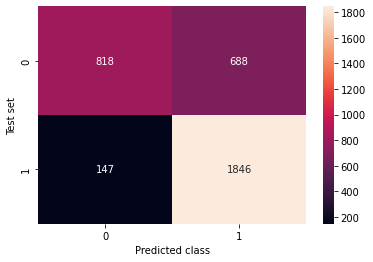

Accuracy for the test set:  0.7613603886824807


In [47]:
 # Confusion Matrix for results
cm = confusion_matrix(Result['user_suggestion'],Result['Predicted_sentiment'])
sb.heatmap(cm,annot= True, fmt='.0f')
plt.xlabel("Predicted class")
plt.ylabel("Test set")
plt.show()
print("Accuracy for the test set: ", accuracy_score(Result['user_suggestion'],Result['Predicted_sentiment']))

In [48]:
for i,x in Result.groupby(['user_suggestion','Predicted_sentiment']):
    print ("Actual "+ str(i[0])+ " Predicted "+str(i[1])+ ":", len(x))

Actual 0 Predicted 0: 818
Actual 0 Predicted 1: 688
Actual 1 Predicted 0: 147
Actual 1 Predicted 1: 1846


In [14]:
def Tokenize(string):
    tokens=nltk.tokenize.word_tokenize(string)
    return " ".join(tokens)

In [15]:
def Lemmatize(string):
    word_lem=WordNetLemmatizer()
    words=string.split() 
    lemmatizeWords=[]
    for each in words:
        lemmatizeWords.append(word_lem.lemmatize(each))
    return " ".join(lemmatizeWords)

In [16]:
def RemoveStopWords(string):
    #Removing Punctuations
    for each in punctuation:
        string=string.replace(each,"")
    
    #Removing Stopwords
    english_stopwords=stopwords.words('english')
    stopwords_removed_tokens=[]
    words=string.split(" ")
    
    for each in words:
        if each not in english_stopwords:
            stopwords_removed_tokens.append(each)
    return " ".join(stopwords_removed_tokens) 

In [17]:
def Refine(string):
    return Lemmatize(RemoveStopWords(Tokenize(string)))